# 투구정보 데이터분석

## 타자별 Kmeans를 통한 스트라이크/볼 모델링

In [16]:
import pandas as pd
import random

In [20]:
df = pd.read_csv("2021 투구정보.csv", encoding = 'utf-8')
df2 = pd.read_csv("final1.csv")
df = pd.merge(df, df2, on=["game_date", "home_team"])
df.dropna()



ParserError: ignored

In [ ]:
df.head()
df.refree.unique()

In [ ]:
df.dropna(inplace=True)


In [ ]:
정은원 = df[(df.hitter_name=="정은원") & (df.judgement=="스트라이크") | (df.hitter_name=="정은원") &(df.judgement=="볼")]
df2 = df[(df.judgement=="스트라이크") | (df.judgement=="볼")]

In [ ]:
# 구명환 # 박기택
#명환존 = 정은원[정은원.refree == "구명환"][["x_spot", "y_spot", "judgement"]]
#기택존 = 정은원[정은원.refree == "김갑수"][["x_spot", "y_spot", "judgement"]]
명환존 = df2[df2.refree == "구명환"][["x_spot", "y_spot", "judgement"]]
기택존 = df2[df2.refree == "전일수"][["x_spot", "y_spot", "judgement"]]

명환존_스트라이크_x, 명환존_스트라이크_y = 명환존[(명환존.judgement == "스트라이크")]["x_spot"], 명환존[(명환존.judgement == "스트라이크")]["y_spot"]
명환존_볼_x, 명환존_볼_y = 명환존[(명환존.judgement == "볼")]["x_spot"], 명환존[(명환존.judgement == "볼")]["y_spot"]

기택존_스트라이크_x, 기택존_스트라이크_y = 기택존[(기택존.judgement == "스트라이크")]["x_spot"], 기택존[(기택존.judgement == "스트라이크")]["y_spot"]
기택존_볼_x, 기택존_볼_y = 기택존[(기택존.judgement == "볼")]["x_spot"], 기택존[(기택존.judgement == "볼")]["y_spot"]

In [ ]:
X = 정은원[["x_spot", "y_spot"]]
y = 정은원[["judgement"]]

In [ ]:
X = df2[["x_spot", "y_spot"]]
y = df2[["judgement"]]

In [ ]:
명환존_X = 명환존[["x_spot", "y_spot"]]
명환존_y = 명환존[["judgement"]]

기택존_X = 기택존[["x_spot", "y_spot"]]
기택존_y = 기택존[["judgement"]]

In [ ]:
# 스트라이크일때 1
y = y.replace("볼",0).replace("스트라이크", 1)
y = y.astype(type(1))

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

tr_x, tt_x, tr_y, tt_y = train_test_split(X, y)

m = KNeighborsClassifier()
#print(cross_val_score(m, X, y).mean())
m.fit(tr_x, tr_y)
print(m.score(tt_x, tt_y))

origin = pd.concat([X, y], axis=1)
전체존_예측 = pd.concat([X, pd.DataFrame(m.predict(X), columns=["py"], index=X.index)], axis=1)

명환존_예측 = pd.concat([명환존_X, pd.DataFrame(m.predict(명환존_X), columns=["py"], index=명환존_X.index)], axis=1)
기택존_예측 = pd.concat([기택존_X, pd.DataFrame(m.predict(기택존_X), columns=["py"], index=기택존_X.index)], axis=1)

/Users/dokw/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9164326188716433


In [ ]:
import numpy as np
test_pitch = list()
test_szone = list()
for y in range(300):
    for x in range(300):
        test_pitch.append([x, y])

test_pitch = pd.DataFrame(np.array(test_pitch), columns=["x_spot", "y_spot"])

p_test = m.predict(test_pitch)
p_test = np.array(p_test).reshape(300, 300)
for y in range(300):
    for x in range(300):
        if p_test[y][x] == 1:
            test_szone.append([x, y])

test_szone = np.array(test_szone)
t_szone_x = test_szone[:,0]
t_szone_y = test_szone[:,1]

In [ ]:
#x1, y1 = test[test.py=="스트라이크"].min().values[:2]
#width, height = test[test.py=="스트라이크"].max().values[:2] - test[test.py=="스트라이크"].min().values[:2]
#test[test.py==1]

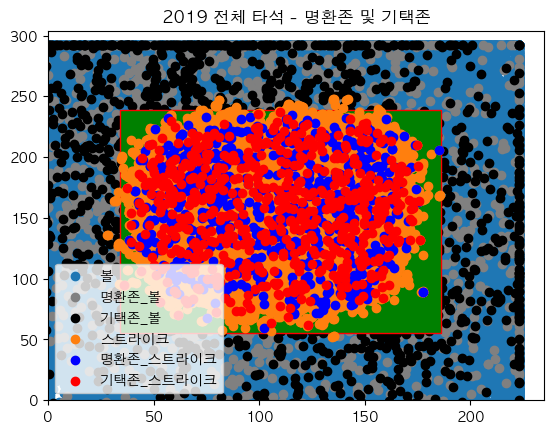

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as patches

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()

ax.scatter(전체존_예측[전체존_예측.py==0].x_spot, 전체존_예측[전체존_예측.py==0].y_spot, label="볼")
ax.scatter(명환존_예측[명환존_예측.py==0].x_spot, 명환존_예측[명환존_예측.py==0].y_spot, label="명환존_볼", c="gray")
ax.scatter(기택존_예측[기택존_예측.py==0].x_spot, 기택존_예측[기택존_예측.py==0].y_spot, label="기택존_볼", c="black")
ax.add_patch(
   patches.Rectangle(
      (x1, y1),                   # (x, y)
      width, height,                     # width, height
      edgecolor = 'red',
      facecolor = 'green',
      fill=True,
   ))
ax.scatter(전체존_예측[전체존_예측.py==1].x_spot, 전체존_예측[전체존_예측.py==1].y_spot, label="스트라이크")


#ax.scatter(명환존[명환존.judgement=="스트라이크"].x_spot, 명환존[명환존.judgement=="스트라이크"].y_spot, label="명환존_스트라이크", c="blue", s=2**2)
#ax.scatter(기택존[기택존.judgement=="스트라이크"].x_spot, 기택존[기택존.judgement=="스트라이크"].y_spot, label="기택존_스트라이크", c="red", s=2**2)
ax.scatter(명환존_예측[명환존_예측.py==1].x_spot, 명환존_예측[명환존_예측.py==1].y_spot, label="명환존_스트라이크", c="blue")
ax.scatter(기택존_예측[기택존_예측.py==1].x_spot, 기택존_예측[기택존_예측.py==1].y_spot, label="기택존_스트라이크", c="red")




plt.title("2019 전체 타석 - 명환존 및 기택존")
plt.legend()

plt.xlim(0, 235)
plt.ylim(0, 304)

plt.show()

## 기타

In [ ]:
df = df[(df.hitter_name=="김성현") | (df.hitter_name=="호잉")]

df2 = df[["hitter_name", "hitter_position", "judgement", "x_spot", "y_spot"]]
df2 = df2[(df2.judgement=="스트라이크") | (df2.judgement=="볼")]
df2.reset_index(inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df2[["hitter_name", "hitter_position", "judgement"]])
data2 = ohe.transform(df2[["hitter_name", "hitter_position", "judgement"]]).toarray()
data2 = pd.DataFrame(data2, columns = ohe.get_feature_names_out())

In [ ]:
tr_data = pd.concat([df2,data2], axis=1)

In [ ]:
tr_data.drop(["hitter_name", "hitter_position", "judgement"], axis=1, inplace=True)

In [ ]:
tr_data

,index,x_spot,y_spot,hitter_name_김성현,hitter_name_호잉,hitter_position_L,hitter_position_R,judgement_볼,judgement_스트라이크
0,3846,137.031091,20.346669,1.0,0.0,0.0,1.0,1.0,0.0
1,3962,7.666143,177.966326,1.0,0.0,0.0,1.0,1.0,0.0
2,9788,57.411010,229.377938,1.0,0.0,0.0,1.0,0.0,1.0
3,9791,80.237097,230.695560,1.0,0.0,0.0,1.0,1.0,0.0
4,9831,117.208707,199.797000,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
805,148251,172.944329,233.736429,0.0,1.0,1.0,0.0,1.0,0.0
806,148311,208.580400,268.064978,0.0,1.0,1.0,0.0,1.0,0.0
807,148313,183.038586,194.375378,0.0,1.0,1.0,0.0,1.0,0.0
808,148314,156.409124,292.000000,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.cluster import KMeans

m = KMeans(n_clusters = 2)

py = m.predict(X)
py


NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
KM_data = pd.concat([tr_data, pd.DataFrame(py, columns=["py"])], axis=1).drop("index", axis=1)

,x_spot,y_spot,hitter_name_김성현,hitter_name_호잉,hitter_position_L,hitter_position_R,judgement_볼,judgement_스트라이크,py
0,137.031091,20.346669,1.0,0.0,0.0,1.0,1.0,0.0,1
1,7.666143,177.966326,1.0,0.0,0.0,1.0,1.0,0.0,1
2,57.411010,229.377938,1.0,0.0,0.0,1.0,0.0,1.0,1
3,80.237097,230.695560,1.0,0.0,0.0,1.0,1.0,0.0,1
4,117.208707,199.797000,1.0,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
1128,100.518269,137.721069,0.0,1.0,1.0,0.0,0.0,1.0,0
1129,75.154517,292.000000,0.0,1.0,1.0,0.0,1.0,0.0,0
1130,81.333607,292.000000,0.0,1.0,1.0,0.0,1.0,0.0,0
1131,89.456617,33.403903,1.0,0.0,0.0,1.0,1.0,0.0,0


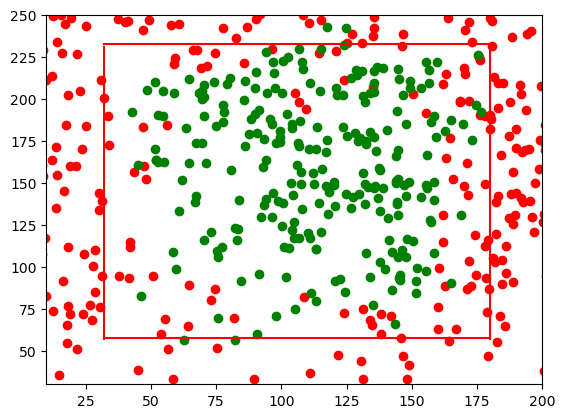

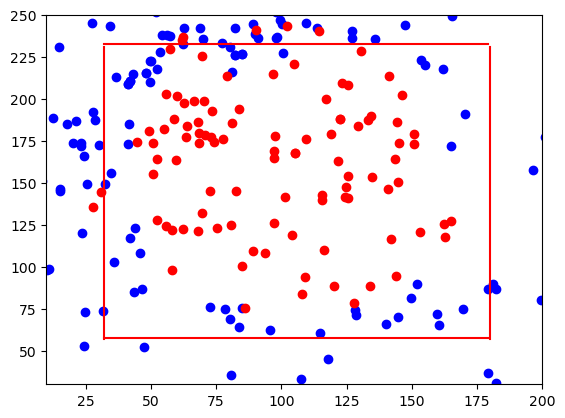

In [ ]:
# 0이 호잉
plt.scatter(KM_data[(KM_data.py==0) & (KM_data.judgement_볼==1.0)].x_spot, tr_data_y[(KM_data.py==0)& (KM_data.judgement_볼==1.0)].y_spot, c="red")
plt.scatter(KM_data[(KM_data.py==0) & (KM_data.judgement_스트라이크==1.0)].x_spot, tr_data_y[(KM_data.py==0)& (KM_data.judgement_스트라이크==1.0)].y_spot, c="green")
plt.plot(range(32, 180), [57.8] * 148, color = "red")
plt.plot(range(32, 180), [232.8] * 148, color = "red")
plt.plot([32] * 175, range(57, 232), color = "red")
plt.plot([180] * 175, range(57, 232), color = "red")
plt.xlim(10, 200)
plt.ylim(30, 250)
plt.show()

# 1이 김성현
plt.scatter(KM_data[(KM_data.py==1) & (KM_data.judgement_볼==1.0)].x_spot, tr_data_y[(KM_data.py==1) & (KM_data.judgement_볼==1.0)].y_spot, c="blue")
plt.scatter(KM_data[(KM_data.py==1) & (KM_data.judgement_스트라이크==1.0)].x_spot, tr_data_y[(KM_data.py==1) & (KM_data.judgement_스트라이크==1.0)].y_spot, c="red")
plt.plot(range(32, 180), [57.8] * 148, color = "red")
plt.plot(range(32, 180), [232.8] * 148, color = "red")
plt.plot([32] * 175, range(57, 232), color = "red")
plt.plot([180] * 175, range(57, 232), color = "red")
plt.xlim(10, 200)
plt.ylim(30, 250)
plt.show()

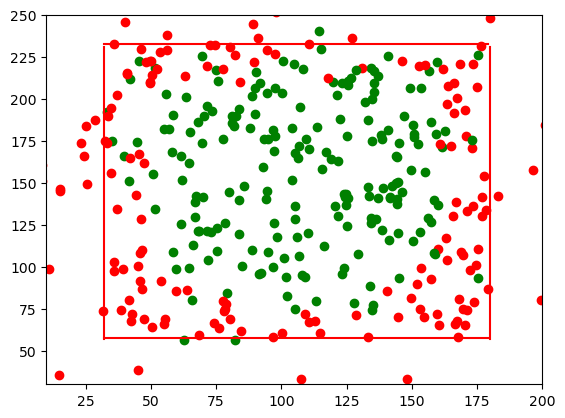

In [ ]:
inner_스트라이크 = 스트존[스트존.judgement == "스트라이크"].iloc[random.sample(range(300), 100)]
inner_볼 = 스트존[스트존.judgement == "볼"].iloc[random.sample(range(300), 100)]
전체_스트라이크 = df[df.judgement == "스트라이크"].iloc[random.sample(range(300), 100)]
전체_볼 = df[df.judgement == "볼"].iloc[random.sample(range(300), 100)]

plt.scatter(inner_스트라이크.x_spot, inner_스트라이크.y_spot, label="스트라이크", color="green")
plt.scatter(inner_볼.x_spot, inner_볼.y_spot, label = "볼", color="red")
plt.scatter(전체_스트라이크.x_spot, 전체_스트라이크.y_spot, label = "볼", color="green")
plt.scatter(전체_볼.x_spot, 전체_볼.y_spot, label = "볼", color="red")


plt.plot(range(32, 180), [57.8] * 148, color = "red")
plt.plot(range(32, 180), [232.8] * 148, color = "red")
plt.plot([32] * 175, range(57, 232), color = "red")
plt.plot([180] * 175, range(57, 232), color = "red")
plt.xlim(10, 200)
plt.ylim(30, 250)
plt.show()




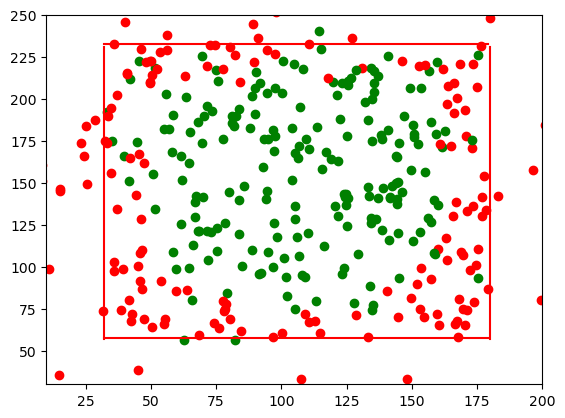

In [ ]:
inner_스트라이크 = 스트존[스트존.judgement == "스트라이크"].iloc[random.sample(range(300), 100)]
inner_볼 = 스트존[스트존.judgement == "볼"].iloc[random.sample(range(300), 100)]
전체_스트라이크 = df[df.judgement == "스트라이크"].iloc[random.sample(range(300), 100)]
전체_볼 = df[df.judgement == "볼"].iloc[random.sample(range(300), 100)]

plt.scatter(inner_스트라이크.x_spot, inner_스트라이크.y_spot, label="스트라이크", color="green")
plt.scatter(inner_볼.x_spot, inner_볼.y_spot, label = "볼", color="red")
plt.scatter(전체_스트라이크.x_spot, 전체_스트라이크.y_spot, label = "볼", color="green")
plt.scatter(전체_볼.x_spot, 전체_볼.y_spot, label = "볼", color="red")


plt.plot(range(32, 180), [57.8] * 148, color = "red")
plt.plot(range(32, 180), [232.8] * 148, color = "red")
plt.plot([32] * 175, range(57, 232), color = "red")
plt.plot([180] * 175, range(57, 232), color = "red")
plt.xlim(10, 200)
plt.ylim(30, 250)
plt.show()


